# Benchmarking sorting algorithms
The final project assignment for Computational Thinking with Algorithms module, GMIT 2020.

Lecturer: dr Dominic Carr

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 03-04-2020

<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Comparison_computational_complexity.svg" alt="Big O notation" style="width:400px">
  <figcaption>Image source: Wikipedia.</figcaption>
</figure>

___
### Content

1. Introduction
2. Sorting algorithms
3. Benchmarking
4. Results
5. Discussion
6. References
 

**Below is to be deleted**

Ideas:
- discuss terms:
    - sorting
    - efficiency (time efficiency only considered in this project)
    - best-, average- and worst-case time complexity
    - comparison
    - stability
    - inversion
    - sort key data (satellite data neglected in this analysis)
    - in-place sorting   


___

## Introduction

### Sorting algorithms selected for testing

For this project a Python application is written which will be used to benchmark five different sorting algorithms. The benchmarking is about running selected sorting algorithms for various size random numbers arrays and measure the time it takes for run. 

The five sorting algorithms are selected to satisfy the project specification, that is according to the following criteria:

1. A simple comparison-based sort - I have chosen to analyse the **Bubble Sort**
2. An efficient comparison-based sort - I have chosen to analyse the **Quicksort**
3. A non-comparison sort - I have chosen to analyse the **Bucket Sort** 

The remaining two algorithms were left to my choice:

4. Another efficient sort - **Merge Sort**
5. A hybrid sort - **Timsort** 
6. Extra - a Python built-in sorting algorithm - **sorted()** method

Each of the selected algorithms are briefly described followed by the algorithms implementation and benchmarking. Finally, at the end of the report, there is the discussion of the results of the benchmarking process and findings.

___


## Bubble Sort
### Algorithm description
...


In [1]:
##### Credits #####
# Source: https://stackabuse.com/sorting-algorithms-in-python/
# Adapted and commented by the author of this Notebook

##### Function definition #####
# Function performing the bubble sort; it takes an arrey to be sorted as an argument
def bubble_sort(array):
    # Variable swapped is initially set to True, so that the loop runs at least once
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(array) - 1):
            if array[i] > array[i + 1]:
                # Swap the elements
                array[i], array[i + 1] = array[i + 1], array[i]
                # Set the swapped to True so it will loop again
                swapped = True


In [ ]:
# Verify the algorithm works
random_list_of_nums = [2, 7, 1, 8, 4, 1]
print("Before:",random_list_of_nums)

bubble_sort(random_list_of_nums)
print("After:",random_list_of_nums)

## Quicksort
### Algorithm description
...




<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif"  alt="Quick sort visualisation" style="width:400px; height:200px">
  <figcaption>Image source: Wikipedia.</figcaption>
</figure>

### Algorithm implementation
Based on https://youtu.be/u4tVQszsyEQ

In [2]:
##### Credits #####
# Source: https://youtu.be/u4tVQszsyEQ
# Adapted and commented by the author of this Notebook


##### Function definition #####
# Function performing the quick sort; it takes an array to be sorted as an argument
def sortowanie_szybkie(array):
    
    # creation of empty lists
    mniejsze = [] # less than the pivot
    rowne = [] # equal to the pivot
    wieksze =[] # greater than the pivot
    
    # base case of the recursion 
    # check whether the list is more than one element long (otherwise, one-element list is considered to be sorted)
    if len(array) <= 1:
        return array
    
    # recursion algorithm for a list that holds more than one element
    else: 
        # set the pivot value at the middle element of the list
        middle = (len(array))//2
        pivot = array[middle]
        
        # let's consider three cases for each element of the list
        for x in array:
            # case #1 - the current element is greater than the pivot
            if x > pivot:
                wieksze.append(x) # add the current element to the list "wieksze"
            # case #2 - the current element is equal to the pivot
            elif x == pivot:
                rowne.append(x) # add the current element to the list "rowne"
            # case #3 - the current element is less than the pivot
            else:
                mniejsze.append(x) # add the current element to the list "mniejsze"
        
        # as a result of the above loop, the function will return:
        # in the middle: the element(s) that has just been sorted, i.e. equal to the pivot(?) (as well as those sorted on previous recurses)
        # on the left-hand side: elements that are less than the pivot - still unsorted, therefore the same function is called recursively (with the "mniejsze" list as an argument)
        # on the the right-hand side: elements that are greater than the pivot - still unsorted, therefore the same function is called recursively (with the "wieksze" list as an argument)
        
        return sortowanie_szybkie(mniejsze) + rowne + sortowanie_szybkie(wieksze)
        

In [ ]:
# Verify the algorithm works
random_list_of_nums = [2, 7, 1, 8, 4, 1]
print("Before:",random_list_of_nums)
print("After:",sortowanie_szybkie(random_list_of_nums))

## Bucket Sort
### Algorithm description
...



In [3]:
##### Credits #####
# Own implementation, developed based on pseudocode from https://youtu.be/geVyIsFpxUs
# Adapted and commented by the author of this Notebook

# Auxiliary function that sorts the content of each bucket, using the insert sort
# Source: https://www.geeksforgeeks.org/bucket-sort-2/
def insertSort(b): 
    for i in range(1, len(b)): 
        up = b[i] 
        j = i - 1
        while j >=0 and b[j] > up:  
            b[j + 1] = b[j] 
            j -= 1
        b[j + 1] = up      
    return b   
        

##### Function definition #####

# import required external libraries
import math # will be needed for ceil() method

# define the function, which takes as an argument the array to be sorted
def bucket_sort(array):

    #print("Original list:", arr) # for testing
    
    # number of buckets
    n_buckets = 6 # assumed arbitrarily

    # create an empty array of buckets, where each bucket is also an empty array
    bucket = []
    for i in range(n_buckets):
        bucket.append([])
        
    # define a divider which will be used for sorting;
    # divider is the value of the maximum element of the array to be sorted divided by number of buckets
    divider = math.ceil((max(array)+1)/n_buckets)
    # divider = 10 # alternatively to the above line, it can be just assumed arbitrarily

    
    # sorting the array's element into the buckets (unsorted)
    # loop through the array
    for i in array:
        # determine into which bucket index will fall each element of the arrey
        j = i//divider
        # put the current i-element of the array to the corresponding bucket
        bucket[j].append(i)
    
    # for testing 
    #print("Sorted unto the buckets:", bucket) # for testing
        
    # put sorted content of each bucket into a single array (concatenate single buckets)
    # adopted from https://gist.github.com/sahid/5022081
    sorted_result = []
    for i in range(n_buckets):
        # adding the sorted content of each bucket to the resulting array, 
        # using the insertSort() function iteratively for each bucket
        sorted_result += insertSort(bucket[i])
        
    return sorted_result 


In [ ]:
# Verify the algorithm works
random_list_of_nums = [2, 7, 1, 8, 4, 1]
print("Before:",random_list_of_nums)
print("After:",bucket_sort(random_list_of_nums))

## Merge Sort
### Algorithm description
...

In [4]:
##### Credits #####
# Source: https://stackabuse.com/sorting-algorithms-in-python/
# Adapted and commented by the author of this Notebook


# Auxiliary function, merging and sorting two arrays
def merge(left_list, right_list):
    sorted_list = []
    left_list_index = right_list_index = 0

    # We use the list lengths often, so its handy to make variables
    left_list_length, right_list_length = len(left_list), len(right_list)

    for _ in range(left_list_length + right_list_length):
        if left_list_index < left_list_length and right_list_index < right_list_length:
            # We check which value from the start of each list is smaller
            # If the item at the beginning of the left list is smaller, add it
            # to the sorted list
            if left_list[left_list_index] <= right_list[right_list_index]:
                sorted_list.append(left_list[left_list_index])
                left_list_index += 1
            # If the item at the beginning of the right list is smaller, add it
            # to the sorted list
            else:
                sorted_list.append(right_list[right_list_index])
                right_list_index += 1

        # If we've reached the end of the of the left list, add the elementsgit s
        # from the right list
        elif left_list_index == left_list_length:
            sorted_list.append(right_list[right_list_index])
            right_list_index += 1
        # If we've reached the end of the of the right list, add the elements
        # from the left list
        elif right_list_index == right_list_length:
            sorted_list.append(left_list[left_list_index])
            left_list_index += 1

    # final result of the sorting
    return sorted_list


##### Function definition #####
# Function performing the merge sort; it takes an array to be sorted as an argument
def merge_sort(array):
    # If the list is a single element, return it
    if len(array) <= 1:
        return array

    # Use floor division to get midpoint, indices must be integers
    mid = len(array) // 2

    # Sort and merge each half
    left_list = merge_sort(array[:mid])
    right_list = merge_sort(array[mid:])

    # Merge the sorted lists into a new one
    return merge(left_list, right_list)


In [ ]:
# Verify the algorithm works
random_list_of_nums = [2, 7, 1, 8, 4, 1]
print("Before:",random_list_of_nums)
print("After:",merge_sort(random_list_of_nums))

## Timsort
### Algorithm description
...


In [5]:
##### Credits #####
# Source: https://quinston.com/code-snippets/
# Adapted and commented by the author of this Notebook


import random

# Insert Sort algorithm
# Function InsertionSort() takes one argument - an array
def InsertionSort(array):

    for x in range (1, len(array)):
        for i in range(x, 0, -1):
            if array[i] < array[i - 1]:
                t = array[i]
                array[i] = array[i - 1]
                array[i - 1] = t
            else:
                break
            i = i - 1
    return array


# Auxiliary function that sorts the content of each bucket, using the insert sort
# Source: https://www.geeksforgeeks.org/bucket-sort-2/
#def insertSort(b): 
#    for i in range(1, len(b)): 
#        up = b[i] 
#        j = i - 1
#        while j >=0 and b[j] > up:  
#            b[j + 1] = b[j] 
#            j -= 1
#        b[j + 1] = up      
#    return b   




# Merge Sort implementation
# The Merge() function takes two arguments - two arrays - and merge them together. The function returns yet another array
def Merge(aArr, bArr):
    
    a = 0 # a is a pointer (index position) of aArr array
    b = 0 # b is a pointer of bArr array
    
    # placeholder - an empty array cArr which will be holding sorted values of aArr and bArr arrays
    cArr = []

    # end of loop codition:
    while a < len(aArr) and b < len(bArr):
        # check if a-element of array aArr is less than b-element of array bArr
        if aArr[a] < bArr[b]:
            cArr.append(aArr[a]) # if the condition is satisfied, assign the value of a-element to cArr array
            a = a + 1 # move the pointer to the next aArr array index
            
        elif aArr[a] > bArr[b]:
            cArr.append(bArr[b])
            b = b + 1
        
        # in case the a-element of aArra and b-element of bArr are equal
        else:
            cArr.append(aArr[a])
            cArr.append(bArr[b])
            a = a + 1
            b = b + 1
    
    # when there are no left elements from bArr to compare with aArr, the remaining elements from aArr are appended at the end of cArr array
    while a < len(aArr):
        cArr.append(aArr[a])
        a = a + 1

    while b < len(bArr):
        cArr.append(bArr[b])
        b = b + 1

    # function returns merged the two arrays, sorted
    return cArr


##### Function definition #####
# Implementation of the TimSort sorting algorithm, with an array to be sorted as an argument.
# Funtion TimSort divides the array to be sorted (arr) into smaller chunks of size RUN.
# The variable RUN is defined outside the funtion body, prior to its first call.
def TimSort(array):

    # chunk size - the array will be splitted into this size of chunks, usually the chunk size is between 32 and 64
    RUN = 32   
    
    # divide the array into chunks
    for x in range(0, len(array), RUN): # loop starting from index 0, to the last element of the array, with incrementing step size RUN; note the value of len(arr) is excluded from the loop
        # arr[x: x+RUN] is the current slice of the array (from x to x+RUN)
        # values of the current array slice are transfered (passed) to InsertionSort function; the return from the InsertionSort is already sorted array assigned to the original slice
        array[x: x+RUN] = InsertionSort(array[x: x+RUN])
    
    
    # merging the already sortd slices of the array
    # create an auxiliary variable     
    RUNinc = RUN
    # define loop termination condition
    while RUNinc < len(array):
        
        # the array is divided into pairs of neighbouring slices and passed to Merge() function
        for x in range(0, len(array), 2 * RUNinc):
            # the return from the Merge() function is assigned to the slice (size of 2xRUN) original array
            array[x: x+2 * RUNinc] = Merge(array[x: x+RUNinc], array[x+RUNinc: x+2*RUNinc])
        
        # incrementation for the while loop
        RUNinc = RUNinc*2


In [ ]:
# Verify the algorithm works
random_list_of_nums = [2, 7, 1, 8, 4, 1]
print("Before:",random_list_of_nums)
TimSort(random_list_of_nums)
print("After:",random_list_of_nums)

____
## Benchmarking the sorting algorithms

### Benchmarking algorithm

___
## Data analysis

### Setting the data type

The project is about timing, that is measuring the time required for execution, the selected sorting algorithms. 

From the project brief:
>To benchmark the algorithms, you should use arrays of randomly generated integers with different
input sizes n. You should use a variety of different input sizes, e.g. n=10,n=100,n=500,...,n=10,000
etc. to test the effect of the input size on the running time of each algorithm. See the console output
below for a selection of suggested sizes of n. You may test values of n which are higher than 10,000 if
you wish, e.g. 500,000. Just be aware that algorithms such as Bubble Sort may take a long time to
run when using large values of n!



#### Python environment setup
The following external Python libraries were used in the project for building and analysing the dataset.

In [6]:
import numpy as np
import pandas as pd

#### Dataset attributes

The times for each algorithm and size of the array being sorted is recorded and stored in a a form of a data table. The dataset is organised into columns corresponding to the sorting algorithms, and rows, representing the size of the array. The type of the dataset is Pandas' DataFrame, and is assigned to the variable `data`.

Below I am creating an empty dataset with the following headings only. Subsequently, the value of time for each algorithm and array size will be added to the dataset. Time will be shown in seconds.
* Size - the size of the array, 
* Bubble - Bubble sort algorithm,
* Quick - Quicksort,
* Bucket - Bucket sort,
* Merge - Merge sort,
* Tim - Timsort,
* Python - Python's built in method sorted() - for comparison.

In [7]:
# creation of empty data (just headings)
data = pd.DataFrame(columns = ["Size", "Bubble", "Quick", "Bucket", "Merge", "Tim", "Python"]) 

#data.head() # for testing

#### Size of the array

The size of the array to be sorted is assumed arbitrarily, based on the project brief. 

In [8]:
# adding values of the size column to the dataset
data["Size"] = (100, 250, 500, 750, 1000, 1500, 2000, 2500, 3750, 5000, 7500, 10000, 20000, 50000)

In [ ]:
# for testing
#data["Size"] = (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70)

In [ ]:
# for testing
data.head(3) 

### Random data arrays 

The sorting task is performed on a array of a given size. The arrays consist of integer numbers generated in a range from 0 to 99. In order to make the benchmarking more accurate, the each test will be repeated ten times and the average of the measured times will be added to the dataframe. 

For each of the selected array sizes, ten different arrays will be generated and stored for the analysis. Exactly the same arrays will be used for timing the sorting algorithms, in order to increase the credibility of the benchmarking.

In [9]:
# generating arrays of random numbers
# based on algorithm provided in the project brief
def random_array(size): 
    # create an empty array
    array = []
    # populate the arr list with randomly generated numbers
    for i in range(size):
        array.append(np.random.randint(0, 100)) # random integer numbers in range from 0 to 99
    return array



# generation of arrays for each test sizes

# create an empty container to hold the set of arrays
random_number_arrays = []
# loop through array sizes and for each one assign rundom numbers for each array size (array size is shown in "data" DataFrame, column "size")
for array_size in data["Size"]:
    # create an auxiliary counter representing the index 
    random_number_arrays_index = 0
    # call function random_array(), passing as an argument the number of elements to be generated
    random_number_arrays.append(random_array(array_size))
    # increment the counter by 1
    random_number_arrays_index += 1

In [ ]:
# for testing only, show existing arrays, their sizes and first few elements
'''
for i in range(len(data["Size"])):
    print("\nArray #", i+1, "\tSize:  ", len(random_number_arrays[i]))
    for j in range(len(random_number_arrays[i])):
        if j<5: # print out first 5 elements of the array
            print(j, "\t", random_number_arrays[i][j])
'''

### Benchmarking the algorithms

Getting times and collation the results into the dataframe. Each test is run `num_runs` times and the average time is then put into the dataset.



#### Bubble Sort

Note: only first half of the arrays is tested

In [10]:
# the benchmarking algoirithms is based on the lecture materials

import time


# loop through each array size in data["Size"] column:
# data["Size"] = (100, 250, 500, ...)
for array in range(len(data["Size"])//2): # Note: only first half of the arrays is tested
    
    #print("Array #\t", array+1, "\tSize:", data.loc[(array),"Size"])
    
    # a placeholder to store results for each test
    intermediate_results = []
    
    '''
    # loop through each test sizes
    for i in range(len(random_number_arrays)):
    '''    
    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
        
    # benchmarking the function 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order
        ar = random_number_arrays[array].copy()
        
        
        
        # for testing, after sorting
        #t1 = []
        #for j in range(10):
        #    t1.append(ar[j])
        #print("\tFirst 10 elements before sorting:\t", t1)
        
        
        
        
        # log the start time (time stamp)
        start_time = time.time()
    
        
        ### call the function to be benchmarked
        bubble_sort(ar)
        
        
        
        
        # for testing, after sorting
        #t2 = []
        #for j in range(10):
        #    t2.append(ar[j])
        #print("\tFirst 10 elements after sorting:\t", t2)
        
        
   
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result, added straight to the 'data' dataframe
    average_result = np.mean(intermediate_results)
    #print("Average time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[array, "Bubble"] = average_result

#### Quicksort

In [11]:
# the benchmarking algoirithms is based on the lecture materials

import time


# loop through each array size in data["Size"] column:
# data["Size"] = (100, 250, 500, ...)
for array in range(len(data["Size"])):
    
    #print("Array #\t", array+1, "\tSize:", data.loc[(array),"Size"])
    
    # a placeholder to store results for each test
    intermediate_results = []
    
    '''
    # loop through each test sizes
    for i in range(len(random_number_arrays)):
    '''    
    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
        
    # benchmarking the function 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order
        ar = random_number_arrays[array].copy()
        
        
        # log the start time (time stamp)
        start_time = time.time()
    
    
        ### call the function to be benchmarked
        sortowanie_szybkie(ar)

        
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result, added straight to the 'data' dataframe
    average_result = np.mean(intermediate_results)
    
    #print("Average time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[array, "Quick"] = average_result
    

#### Bucket Sort

Note: not all of the arrays is tested - some larger arrays were truncated to save the computational time

In [12]:
# the benchmarking algoirithms is based on the lecture materials

import time


# loop through each array size in data["Size"] column:
# data["Size"] = (100, 250, 500, ...)
for array in range(len(data["Size"])-2): # Note: not all of the arrays are tested
    
    #print("Array #\t", array+1, "\tSize:", data.loc[(array),"Size"])
    
    # a placeholder to store results for each test
    intermediate_results = []
    
    '''
    # loop through each test sizes
    for i in range(len(random_number_arrays)):
    '''    
    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
        
    # benchmarking the function 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order
        ar = random_number_arrays[array].copy()
        
        
        # log the start time (time stamp)
        start_time = time.time()
    
    
        ### call the function to be benchmarked
        bucket_sort(ar)

        
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result, added straight to the 'data' dataframe
    average_result = np.mean(intermediate_results)
    #print("Average time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[array, "Bucket"] = average_result

#### Merge Sort

In [13]:
# the benchmarking algoirithms is based on the lecture materials

import time


# loop through each array size in data["Size"] column:
# data["Size"] = (100, 250, 500, ...)
for array in range(len(data["Size"])):
    
    #print("Array #\t", array+1, "\tSize:", data.loc[(array),"Size"])
    
    # a placeholder to store results for each test
    intermediate_results = []
    
    '''
    # loop through each test sizes
    for i in range(len(random_number_arrays)):
    '''    
    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
        
    # benchmarking the function 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order
        ar = random_number_arrays[array].copy()
        
        
        # log the start time (time stamp)
        start_time = time.time()
    
    
        ### call the function to be benchmarked
        merge_sort(ar)

        
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result, added straight to the 'data' dataframe
    average_result = np.mean(intermediate_results)
    #print("Average time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[array, "Merge"] = average_result

#### TimSort

In [14]:
# the benchmarking algoirithms is based on the lecture materials

import time


# loop through each array size in data["Size"] column:
# data["Size"] = (100, 250, 500, ...)
for array in range(len(data["Size"])):
    
    #print("Array #\t", array+1, "\tSize:", data.loc[(array),"Size"])
    
    # a placeholder to store results for each test
    intermediate_results = []
    
    '''
    # loop through each test sizes
    for i in range(len(random_number_arrays)):
    '''    
    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
        
    # benchmarking the function 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order
        ar = random_number_arrays[array].copy()
        
        
        # log the start time (time stamp)
        start_time = time.time()
    
    
        ### call the function to be benchmarked
        TimSort(ar)

        
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result, added straight to the 'data' dataframe
    average_result = np.mean(intermediate_results)
    #print("Average time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[array, "Tim"] = average_result

#### Python built-in sortied() function

In [15]:
# the benchmarking algoirithms is based on the lecture materials

import time


# loop through each array size in data["Size"] column:
# data["Size"] = (100, 250, 500, ...)
for array in range(len(data["Size"])):
    
    #print("Array #\t", array+1, "\tSize:", data.loc[(array),"Size"])
    
    # a placeholder to store results for each test
    intermediate_results = []
    
 
    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
        
    # benchmarking the function 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order
        ar = random_number_arrays[array].copy()
        
        
        # log the start time (time stamp)
        start_time = time.time()
    
    
        ### call the function to be benchmarked
        sorted(ar)

        
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result, added straight to the 'data' dataframe
    average_result = np.mean(intermediate_results)
    #print("Average time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[array, "Python"] = average_result

### Display the entire dataframe

In [16]:
# Apply formating to three decimal places
# Source: https://stackoverflow.com/a/42735712
pd.options.display.float_format = '{:,.3f}'.format

In [17]:
data

,Size,Bubble,Quick,Bucket,Merge,Tim,Python
0,100,0.001,0.000,0.000,0.000,0.000,0.000
1,250,0.011,0.000,0.001,0.001,0.001,0.000
2,500,0.044,0.001,0.004,0.003,0.002,0.000
3,750,0.116,0.001,0.006,0.004,0.004,0.000
4,1000,0.183,0.001,0.008,0.005,0.005,0.000
5,1500,0.450,0.002,0.017,0.008,0.008,0.000
6,2000,0.786,0.004,0.033,0.008,0.012,0.000
7,2500,NaN,0.003,0.052,0.011,0.012,0.000
8,3750,NaN,0.004,0.117,0.017,0.019,0.000
9,5000,NaN,0.005,0.214,0.023,0.026,0.001


### Data visualisation

The results of the benchmarking analysis are plotted below in a chart. The x-axis represents the size of the input array, and the y-axis - time it took to sort the array. Each sorting algorithm is shown in a different colour.

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

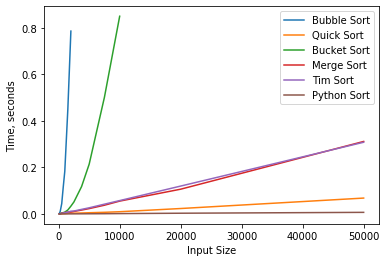

In [19]:
plt.plot(data['Size'], data['Bubble'], label='Bubble Sort')
plt.plot(data['Size'], data['Quick'], label='Quick Sort')
plt.plot(data['Size'], data['Bucket'], label='Bucket Sort')
plt.plot(data['Size'], data['Merge'], label='Merge Sort')
plt.plot(data['Size'], data['Tim'], label='Tim Sort')
plt.plot(data['Size'], data['Python'], label='Python Sort')

# Adding some nice labels 
plt.xlabel("Input Size") 
plt.ylabel("Time, seconds")
plt.legend()
plt.show()

___
## Discussion / Findings

___
## References

### Sorting Algorithms

* Lectures materials [online] Available at: https://learnonline.gmit.ie/course/view.php?id=1696 [Accessed April 2020].
* Quicksort tutorial - Codementor Community [online] Available at: https://www.codementor.io/@garethdwyer/quicksort-tutorial-python-implementation-with-line-by-line-explanation-p9h7jd3r6 [Accessed April 2020].
* Analysis of Algorithms - Big O Analysis  - Geeks for Geeks [online] Available at: https://www.geeksforgeeks.org/analysis-algorithms-big-o-analysis/ [Accessed April 2020].
* Analysis of of different sorting techniques  - Geeks for Geeks [online] Available at: https://www.geeksforgeeks.org/analysis-of-different-sorting-techniques/ [Accessed April 2020].
* Asymptotic Analysis and comparison of sorting algorithms - Geeks for Geeks [online] Available at: https://www.geeksforgeeks.org/asymptotic-analysis-comparison-sorting-algorithms/ [Accessed April 2020].
* Sorting, how to - Python documentation [online] Available at: https://docs.python.org/3/howto/sorting.html [Accessed April 2020].
* Python's built in sort() function source code [online] Available at: https://github.com/python/cpython/blob/master/Objects/listobject.c [Accessed April 2020].
* A tour of the top 5 sorting algorithms with Python code - Medium [online] Available at: https://medium.com/@george.seif94/a-tour-of-the-top-5-sorting-algorithms-with-python-code-43ea9aa02889 [Accessed April 2020].
* Sorting Algorithms - Free Code Camp [online] Available at: https://guide.freecodecamp.org/algorithms/sorting-algorithms/ [Accessed April 2020].
* Big O notation - Wikipedia [online] Available at: https://en.wikipedia.org/wiki/Big_O_notation [Accessed April 2020].
* Sorting Algorithm - Wikipedia [online] Available at: https://en.wikipedia.org/wiki/Sorting_algorithm [Accessed April 2020].
* Sorting Algorithms Demonstration in Java [online] Available at: http://home.westman.wave.ca/~rhenry/sort/#flashsort [Accessed April 2020].
* Sorting Algorithms in Python [online] Available at: https://stackabuse.com/sorting-algorithms-in-python/ [Accessed April 2020].

* Bubble Sort - Wikipedia [online] Available at: https://en.wikipedia.org/wiki/Bubble_sort [Accessed April 2020].

* Bucket Sort - Programiz [online] Available at: https://www.programiz.com/dsa/bucket-sort [Accessed April 2020].
* Bucket Sort - Geeks for Geeks [online] Available at: https://www.geeksforgeeks.org/bucket-sort-2/ [Accessed April 2020].

* Timsort - Wikipedia [online] Available at: https://en.wikipedia.org/wiki/Timsort [Accessed April 2020].
* Python bug tracker - Timsort [online] Available at: https://bugs.python.org/file4451/timsort.txt [Accessed April 2020].




### Sorting Algorithm Visualisations
* Visualising Sorting [online] Available at: https://corte.si/posts/code/visualisingsorting/index.html [Accessed April 2020].
* Sorting Algorithm Animations [online] Available at: https://www.toptal.com/developers/sorting-algorithms [Accessed April 2020].
* Visualising Python's Timsort [online] Available at: https://corte.si/posts/code/timsort/index.html [Accessed April 2020].

* Hilbert Curve + Sorting Algorithms + Procrastination = ? [online] Available at: https://corte.si/posts/code/sortvis-fruitsalad/index.html [Accessed April 2020].
* Timsort - a study in grayscale [online] Available at: https://corte.si/posts/code/timsort-grayscale/index.html [Accessed April 2020].


### Data analysis
* Google [online] Available at: https://google.com [Accessed April 2020].


___

Andrzej Kocielski, 2020